In [2]:
library(ggplot2)
library(GGally)
library(plotrix)
library(jmuOutlier)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘jmuOutlier’


The following object is masked from ‘package:plotrix’:

    plotCI




1. Моделировать выборку из а) распределения exp(1) б) распределения Коши с помощью метода обратной функции. Построить гистограмму, сравнить со встроенным методом.

In [ ]:
Y=runif(10000,0,1)
X1=-log(1-Y)
X2=tan(pi*(Y-0.5))
X1r=rexp(10000,1)
X2r=rcauchy(10000,0,1)
mycol<-rgb(0,0,255,max=255,alpha=120)
hist(X1,col=1,breaks=50)
hist(X1r,col=mycol,breaks=50,add=TRUE)
hist(X2[abs(X2)<20],breaks=50,col=1)
hist(X2r[abs(X2r)<20],breaks=50,col=mycol,add=TRUE)

2. Моделировать выборку из равномерного распределения на единичном круге: а) методом выбора с отклонениями, б)* методом условных распределений, в) с помощью полярных координат.

In [ ]:
regime=readline()
n=readline()
if (n==''){
    n=1000
}else{
    n=strtoi(n)
}
regime='a'
if (regime=='a'){
    Xc=0
    Yc=0
    count=0
    while (count<n){
        X<-runif(1,min=-1,max=1)
        Y<-runif(1,min=-1,max=1)
        if (X^2+Y^2<=1){
            Xc[count+1]=X
            Yc[count+1]=Y
            count=count+1
        }
    }
    plot(Xc,Yc,xlim=c(-1,1),ylim=c(-1,1))
    x=seq(-1,1,0.001)
    lines(x,(1-x^2)^0.5)
    lines(x,-(1-x^2)^0.5)
}
regime='b'
if (regime=='b'){
    Xc=0
    Yc=0
    count=0
    while (count<n){
        X<-runif(1,min=-1,max=1)
        ind=rbinom(1,1,(1-X^2)^0.5)
        if (ind==1){
            Xc[count+1]=X
            Yc[count+1]<-runif(1,min=-(1-X^2)^0.5,max=(1-X^2)^0.5)
            count=count+1
        }
    }
    plot(Xc,Yc,xlim=c(-1,1),ylim=c(-1,1))
    x=seq(-1,1,0.001)
    lines(x,(1-x^2)^0.5)
    lines(x,-(1-x^2)^0.5)
}
regime='c'
if (regime=='c'){
    phi=runif(n,0,2*pi)
    r=(runif(n,0,1))^0.5
    Xc=0
    Yc=0
    for (i in 1:n){
        Xc[i]=r[i]*cos(phi[i])
        Yc[i]=r[i]*sin(phi[i])
    }
    plot(Xc,Yc,xlim=c(-1,1),ylim=c(-1,1))
    x=seq(-1,1,0.001)
    lines(x,(1-x^2)^0.5)
    lines(x,-(1-x^2)^0.5)
}


3. Моделировать выборку с плотностью а) Лапласа б) exp(−x)/2, x > 0 и exp(2x), x < 0. Построить гистограмму. (Использовать смеси распределений.)

In [ ]:
regime=readline()
regime='laplace'
if (regime=='laplace'){#laplace(0,1)
    Y<-rbinom(10000,1,1/2)
    X1<-rexp(10000,1)
    X=0
    for (i in 1:10000){
        if (Y[i]==1){
            X[i]=X1[i]
        }else{
            X[i]=-X1[i]
        }
    }
    hist(X,breaks=100)
}
regime='exp'
if (regime=='exp'){
    Y<-rbinom(10000,1,1/2)
    X1<-rexp(10000,1)
    X2<-rexp(10000,2)
    X=0
    for (i in 1:10000){
        if (Y[i]==1){
            X[i]=X1[i]
        }else{
            X[i]=-X2[i]
        }
    }
    hist(X,breaks=100)
}

4. *Моделировать выборку с плотностью [формула]. Построить гистограмму

In [ ]:
X=0
count=0
while (count<10000){
    Y<-rlaplace(1,0,2^0.5)
    Z<-rbinom(1,1,(exp(-Y^2/2+abs(Y))+(2*pi)^0.5)/(exp(1/2)+(2*pi)^0.5))
    if (Z[1]==1){
        X[count+1]=Y
        count=count+1
    }
}
hist(X,freq=FALSE,breaks=100)
curve(1/3*(1/(2*pi)^0.5*exp(-x^2/2)+exp(-abs(x))),add=TRUE)

5. Смоделировать с помощью алгоритма Acceptance-Rejection выборку из а) треугольного распределения (c плотностью (1 − |x|) I(x ∈ [−1, 1])); б)* нормального распределения с помощью распределения Лапласа.

norm


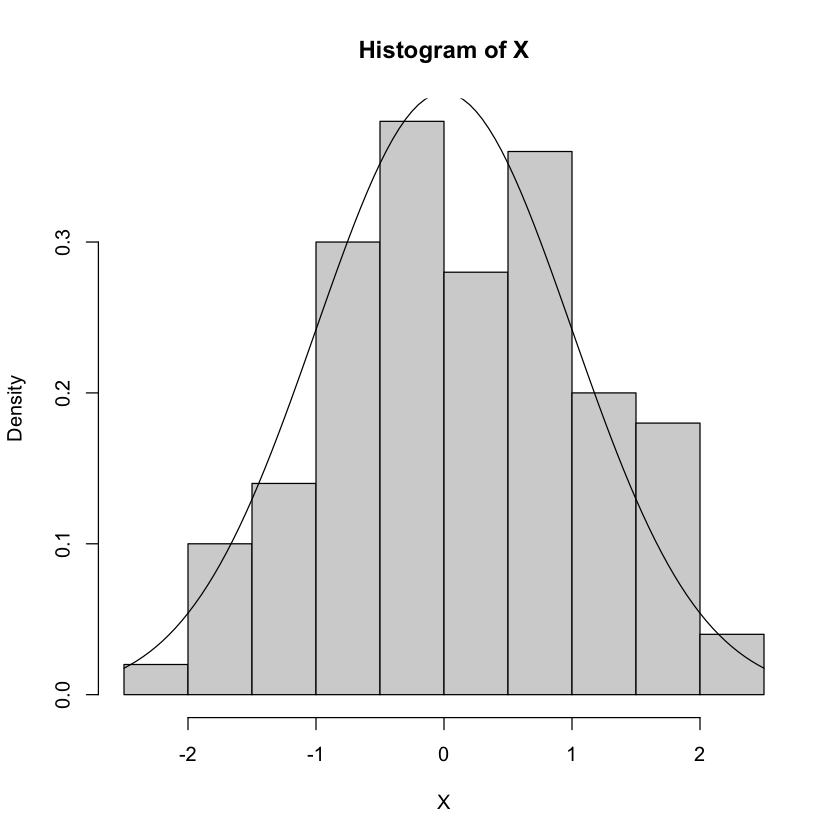

In [5]:
regime=readline()
if (regime=='triangle'){
    X=0
    count=1
    while (count<=100000){
        Y<-runif(1,min=-1,max=1)
        Z<-rbinom(1,1,(1-abs(Y[1])))
        if (Z==1){
            X[count]=Y[1]
            count=count+1
        }
    }
    hist(X,freq=FALSE,breaks=100)
}
if (regime=='norm'){
    X=0
    count=1
    while (count<=100){
        Y<-rlaplace(1,0,2^0.5)
        Z<-rbinom(1,1,exp(-1/2-Y^2/2+abs(Y)))
        if (Z==1){
            X[count]=Y
            count=count+1
        }
    }
    hist(X,freq=FALSE)
    curve(dnorm(x,0,1),add=TRUE)
}